In [51]:
import pickle
import pandas as pd
import os
import streamlit as st
import altair as alt
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

In [18]:
df = pd.read_csv('../data/test_location_data_gh.csv')
df.head()

/tmp/ipykernel_352482/325658165.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/test_location_data_gh.csv')


,Unnamed: 0,advertiser_id,datetime,latitude,longitude,horizontal_accuracy,carrier,model,wifi_ssid,wifi_bssid,geohash
0,0,54aa7153-1546-ce0d-5dc9-aa9e8e371f00,2018-04-08 00:00:00,46.232380,-119.222652,4.20,55,Note 6,NaN,NaN,c25pp02e
1,1,07e28697-2930-a575-6c51-2267182152f8,2018-04-08 00:00:00,46.352059,-119.323855,33.95,55,Lumia 638,NaN,NaN,c25pswph
2,2,c0371365-e342-9427-0688-47938aeea976,2018-04-08 00:00:00,46.268433,-119.270122,1.74,55,S5,NaN,NaN,c25pjyyj
3,3,3594f123-214f-1763-b7f1-395350c00190,2018-04-08 00:00:00,46.265100,-119.268490,41.55,55,XL,NaN,NaN,c25pjyr3
4,4,340ccc1c-9398-bbe6-599b-0f15913f4269,2018-04-08 00:00:00,46.274329,-119.273700,3.20,55,V20,NaN,NaN,c25pjzgx


In [26]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [57]:
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df

,Unnamed: 0,advertiser_id,datetime,latitude,longitude,horizontal_accuracy,carrier,model,wifi_ssid,wifi_bssid,geohash,datetime_new,hour,day,year,month
0,0,54aa7153-1546-ce0d-5dc9-aa9e8e371f00,2018-04-08 00:00:00,46.232380,-119.222652,4.20,55,Note 6,NaN,NaN,c25pp02e,2018-04-08 00:00:00,0,8,2018,4
1,1,07e28697-2930-a575-6c51-2267182152f8,2018-04-08 00:00:00,46.352059,-119.323855,33.95,55,Lumia 638,NaN,NaN,c25pswph,2018-04-08 00:00:00,0,8,2018,4
2,2,c0371365-e342-9427-0688-47938aeea976,2018-04-08 00:00:00,46.268433,-119.270122,1.74,55,S5,NaN,NaN,c25pjyyj,2018-04-08 00:00:00,0,8,2018,4
3,3,3594f123-214f-1763-b7f1-395350c00190,2018-04-08 00:00:00,46.265100,-119.268490,41.55,55,XL,NaN,NaN,c25pjyr3,2018-04-08 00:00:00,0,8,2018,4
4,4,340ccc1c-9398-bbe6-599b-0f15913f4269,2018-04-08 00:00:00,46.274329,-119.273700,3.20,55,V20,NaN,NaN,c25pjzgx,2018-04-08 00:00:00,0,8,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346124,1346124,7645323d-3d80-f127-9f49-5e72fce6ef95,2018-04-08 23:59:59,46.255700,-119.259577,8.47,55,iPhone 4s,NaN,NaN,c25pnhtf,2018-04-08 23:59:59,23,8,2018,4
1346125,1346125,ba00512e-2711-4108-5323-64023001dfe7,2018-04-08 23:59:59,46.276267,-119.281460,5.76,55,Lumia 638,NaN,NaN,c25pm8mf,2018-04-08 23:59:59,23,8,2018,4
1346126,1346126,33026704-1230-4780-78bf-091ab7811618,2018-04-08 23:59:59,46.212900,-119.106504,33.26,55,S8,NaN,NaN,c25qcsv3,2018-04-08 23:59:59,23,8,2018,4
1346127,1346127,e08cb98c-8dc8-b890-3638-6d870b5647d6,2018-04-08 23:59:59,46.263570,-119.398550,1.27,55,Lumia 638,NaN,NaN,c25p5n08,2018-04-08 23:59:59,23,8,2018,4


In [58]:
hourly_counts = df.groupby(['year','month','day','hour']).size().reset_index(name='count')
hourly_counts

,year,month,day,hour,count
0,2018,4,8,0,26093
1,2018,4,8,1,10202
2,2018,4,8,2,5402
3,2018,4,8,3,3211
4,2018,4,8,4,1320
5,2018,4,8,5,1448
6,2018,4,8,6,1890
7,2018,4,8,7,36288
8,2018,4,8,8,86390
9,2018,4,8,9,97732


In [64]:
hourly_counts

,year,month,day,hour,count,datetime
0,2018,4,8,0,26093,2018-04-08 00:00:00
1,2018,4,8,1,10202,2018-04-08 01:00:00
2,2018,4,8,2,5402,2018-04-08 02:00:00
3,2018,4,8,3,3211,2018-04-08 03:00:00
4,2018,4,8,4,1320,2018-04-08 04:00:00
5,2018,4,8,5,1448,2018-04-08 05:00:00
6,2018,4,8,6,1890,2018-04-08 06:00:00
7,2018,4,8,7,36288,2018-04-08 07:00:00
8,2018,4,8,8,86390,2018-04-08 08:00:00
9,2018,4,8,9,97732,2018-04-08 09:00:00


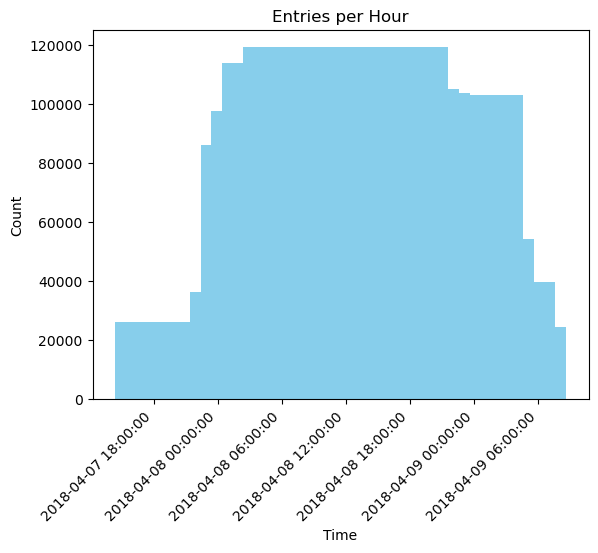

In [63]:
# Combine year, month, day, and hour to create a new datetime column
hourly_counts['datetime'] = pd.to_datetime(hourly_counts[['year', 'month', 'day', 'hour']])

# Create Matplotlib bar chart with a cool color scheme
plt.bar(hourly_counts['datetime'], hourly_counts['count'], color='skyblue')

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:00:00'))

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Entries per Hour')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
